Epoch 1, Loss: 0.6123401522636414
Epoch 2, Loss: 0.3823278248310089
Epoch 3, Loss: 0.22872459888458252
Epoch 4, Loss: 0.3644448518753052
Epoch 5, Loss: 0.3523516058921814
Epoch 6, Loss: 0.35985368490219116
Epoch 7, Loss: 0.3444940149784088
Epoch 8, Loss: 0.21277180314064026
Epoch 9, Loss: 0.1780516803264618
Epoch 10, Loss: 0.36229783296585083
Epoch 11, Loss: 0.18779820203781128
Epoch 12, Loss: 0.3509841859340668
Epoch 13, Loss: 0.20941750705242157
Epoch 14, Loss: 0.15452829003334045
Epoch 15, Loss: 0.19470781087875366
Epoch 16, Loss: 0.19062583148479462
Epoch 17, Loss: 0.10117536783218384
Epoch 18, Loss: 0.18262094259262085
Epoch 19, Loss: 0.16038337349891663
Epoch 20, Loss: 0.157331645488739
Epoch 21, Loss: 0.17737367749214172
Epoch 22, Loss: 0.04642334207892418
Epoch 23, Loss: 0.25836899876594543
Epoch 24, Loss: 0.06917015463113785
Epoch 25, Loss: 0.08777817338705063
Epoch 26, Loss: 0.13940952718257904
Epoch 27, Loss: 0.07308443635702133
Epoch 28, Loss: 0.08953113853931427
Epoch 29, 

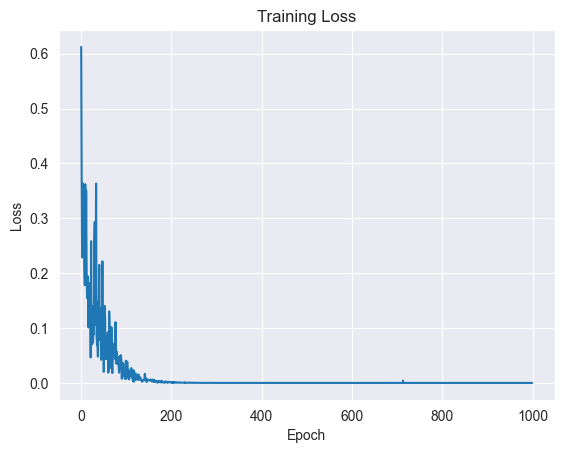

Accuracy: 0.8825910931174089, F1 Score: 0.8825910931174089, ROC AUC: 0.8827213114754098


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('Resources/Data/Encoded_Resampled_HR_Analytics.csv')
X = df.drop('Attrition', axis=1).values
y = df['Attrition'].values

# Data Preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Create DataLoader
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32, shuffle=False)

# Define the Neural Network model
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(34, 50)
        self.fc2 = nn.Linear(50, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss, and optimizer
model = NN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
train_loss = []
for epoch in range(1000):
    for batch in train_loader:
        X_batch, y_batch = batch
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    train_loss.append(loss.item())
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Evaluate the model
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for batch in test_loader:
        X_batch, y_batch = batch
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.tolist())
        y_true.extend(y_batch.tolist())

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

# Visualize the training loss
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

print(f"Accuracy: {accuracy}, F1 Score: {f1}, ROC AUC: {roc_auc}")